In [1]:
# Bibliotecas usadas:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Leitura do banco de dados:
df = pd.read_csv("../data/fitness_gym.csv")

In [3]:
# Vizualização "geral" do banco de dados
df

,check_in_id,date,time,member_id,age,gender,membership_type,activity,duration_minutes,calories_burned,activity_category,attendance_streak,satisfaction_score,cancelled,cancellation_reason
0,CHECK_0001,2023-01-01,07:16:00,MEMBER_0054,56,F,Basic,Yoga,50,162,Bem-estar,5,4,False,NaN
1,CHECK_0002,2023-01-02,18:47:00,MEMBER_0021,18,F,Premium,CrossFit,64,633,Funcional,22,5,False,NaN
2,CHECK_0003,2023-01-04,07:54:00,MEMBER_0072,36,M,Premium,Musculação,73,417,Força,16,5,False,NaN
3,CHECK_0004,2023-01-08,12:10:00,MEMBER_0016,19,F,Basic,Jump,41,360,Cardio,11,4,False,NaN
4,CHECK_0005,2023-01-12,08:14:00,MEMBER_0059,26,M,Basic,Musculação,81,462,Força,9,5,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,CHECK_0196,2023-12-23,12:29:00,MEMBER_0002,55,M,Premium,Pilates,56,252,Bem-estar,19,4,False,NaN
196,CHECK_0197,2023-12-27,11:47:00,MEMBER_0024,55,M,VIP,Zumba,63,360,Dança,17,4,False,NaN
197,CHECK_0198,2023-12-27,17:47:00,MEMBER_0074,30,M,Premium,CrossFit,76,760,Funcional,11,3,False,NaN
198,CHECK_0200,2023-12-30,07:20:00,MEMBER_0022,25,F,Premium,Zumba,55,315,Dança,22,4,False,NaN


In [4]:
# Informações principais
df.describe()

,age,duration_minutes,calories_burned,attendance_streak,satisfaction_score
count,200.000000,200.000000,200.000000,200.000000,200.00000
mean,42.485000,56.720000,356.055000,13.340000,4.04500
std,13.730711,13.061955,149.449381,6.031275,0.58711
min,18.000000,24.000000,106.000000,1.000000,3.00000
25%,30.000000,47.000000,245.750000,9.000000,4.00000
50%,42.000000,57.000000,328.000000,13.000000,4.00000
75%,56.000000,64.000000,442.000000,18.000000,4.00000
max,64.000000,94.000000,910.000000,28.000000,5.00000


# **Análise tempo de treino e tipo de atividade**

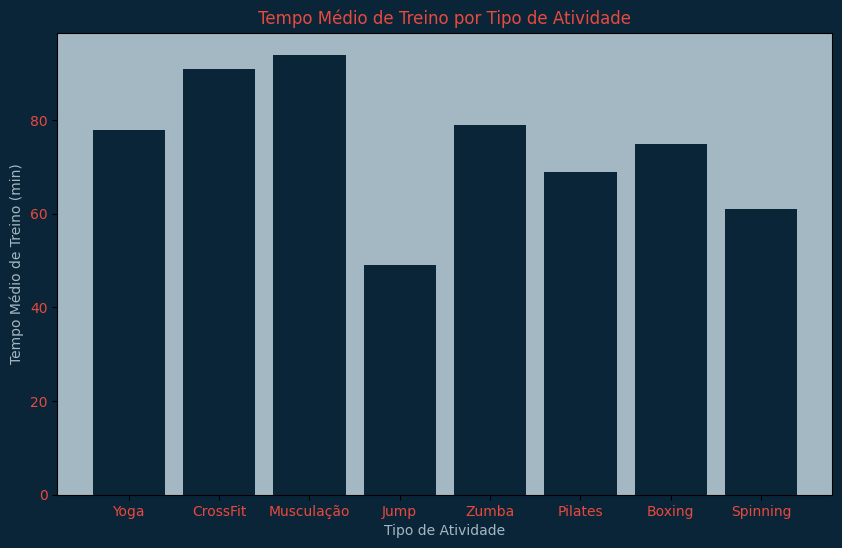

In [5]:
# Tamanho e cor da figura
plt.figure(figsize=(10, 6), facecolor="#0A2538")

# Plotando o gráfico
plt.bar(
    df["activity"],
    df["duration_minutes"],
    color="#0A2538",
    linewidth=0,
)

# Definições de cores e títulos
plt.gca().set_facecolor("#A4B8C4")
plt.title(
    "Tempo Médio de Treino por Tipo de Atividade",
    color="#E84A3E",
)
plt.xlabel("Tipo de Atividade", color="#A4B8C4")
plt.ylabel(
    "Tempo Médio de Treino (min)", color="#A4B8C4"
)
plt.xticks(color="#E84A3E")
plt.yticks(color="#E84A3E")

plt.show()

# **Analise relação entre gênero e atividade**

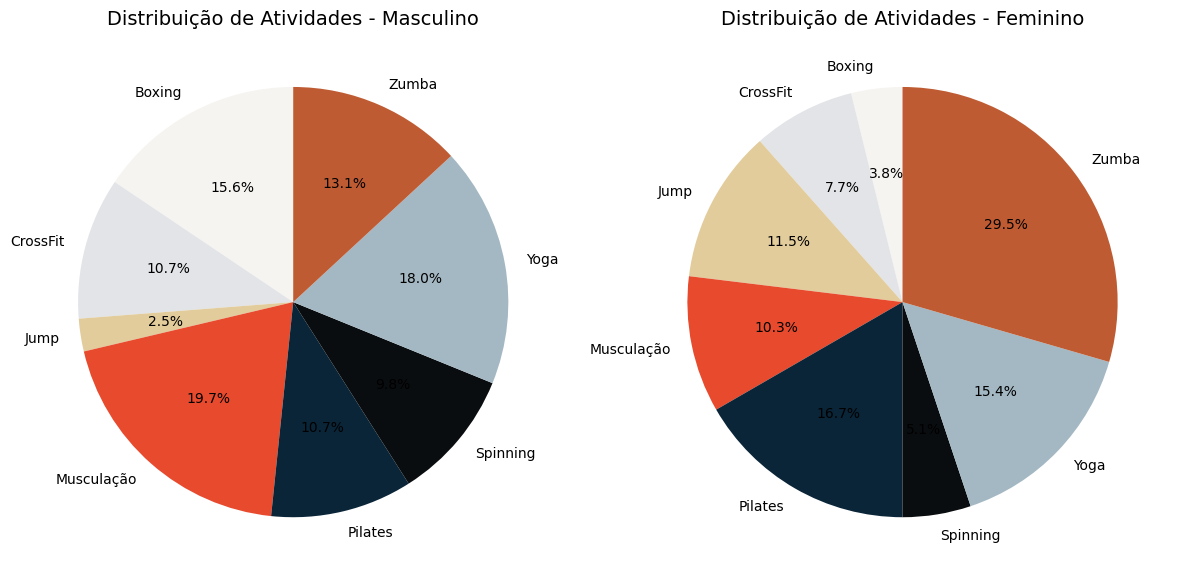

In [6]:
# Apartir da operação de agrupamento fazemos contagem das relações entre cada gênero e atividade como size e o unstack basicamente organiza os dados obtidos no Dataframe
preferencias = (
    df.groupby(["gender", "activity"])
    .size()
    .unstack(fill_value=0)
)

# Definindo o tamanho da figura
plt.figure(figsize=(12, 6))

# Definido a paleta de cores dos gráficos
colors = [
    "#F6F4F1",
    "#E2E4E7",
    "#E2CC9C",
    "#E84A2E",
    "#0A2538",
    "#0A0D0F",
    "#A4B8C4",
    "#BF5B32",
]

# Gráfico de pizza para o gênero masculino
plt.subplot(1, 2, 1)
plt.pie(
    preferencias.loc["M"],
    labels=preferencias.columns,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
)
plt.title(
    "Distribuição de Atividades - Masculino",
    fontsize=14,
)

# Gráfico de pizza para Feminino
plt.subplot(1, 2, 2)
plt.pie(
    preferencias.loc["F"],
    labels=preferencias.columns,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
)
plt.title(
    "Distribuição de Atividades - Feminino",
    fontsize=14,
)

# Para mostrar os gráficos
plt.tight_layout()
plt.show()

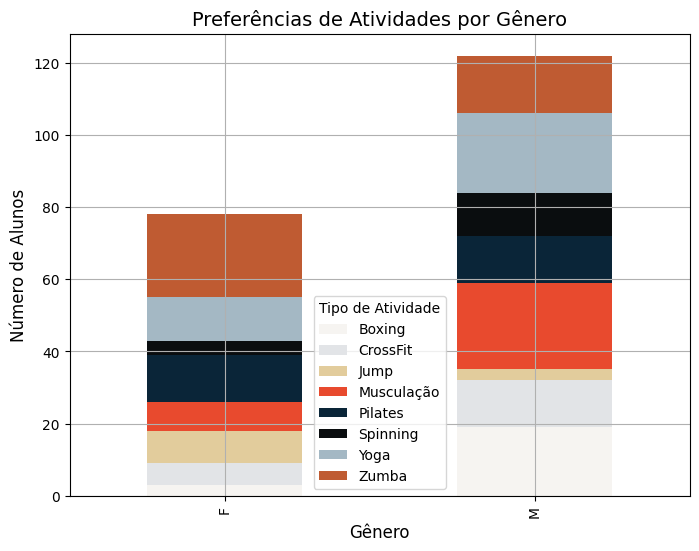

In [7]:
# Agrupamento e contagem das relações entre cada gênero e atividade
preferencias = (
    df.groupby(["gender", "activity"])
    .size()
    .unstack()
)

# Definindo a paleta de cores do gráfico
colors = [
    "#F6F4F1",
    "#E2E4E7",
    "#E2CC9C",
    "#E84A2E",
    "#0A2538",
    "#0A0D0F",
    "#A4B8C4",
    "#BF5B32",
]

# Usando o método do pandas para plotar o gráfico por permitir o empilhamento das barras
preferencias.plot(
    kind="bar",
    stacked=True,
    figsize=(8, 6),
    color=colors,
)

# Customizando informações:
plt.xlabel("Gênero", fontsize=12)
plt.ylabel("Número de Alunos", fontsize=12)
plt.title(
    "Preferências de Atividades por Gênero",
    fontsize=14,
)
plt.legend(title="Tipo de Atividade")
plt.grid(True)

# Para mostrar o gráfico:
plt.show()

# **Análise da média de satisfação por tipo de plano**

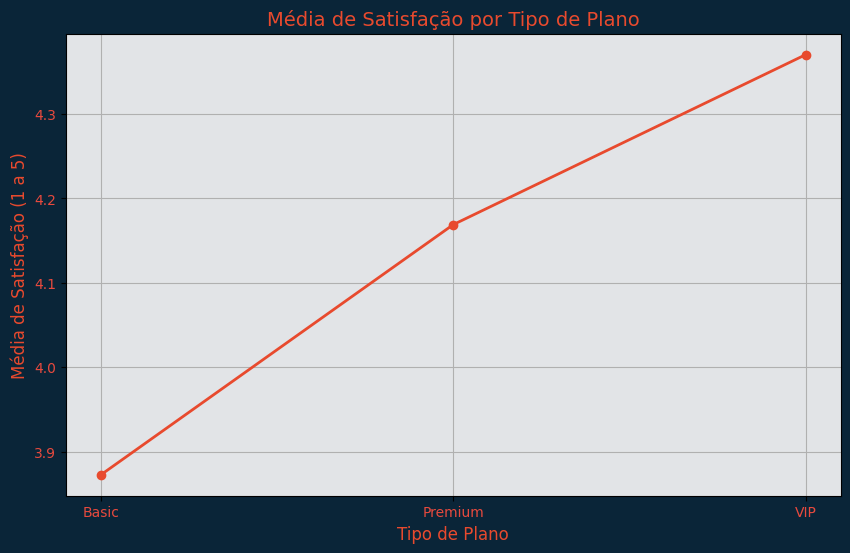

In [8]:
# Calculando a média de satisfação para cada tipo de plano
media_satisfacao = df.groupby("membership_type")[
    "satisfaction_score"
].mean()

# Definido o tamanaho do gráfico
plt.figure(figsize=(10, 6), facecolor="#0A2538")

# plotando o gráfico
plt.plot(
    media_satisfacao.index,
    media_satisfacao.values,
    marker="o",
    color="#E84A2E",
    linewidth=2,
)

# Definindo a aparência do gráfico
plt.title(
    "Média de Satisfação por Tipo de Plano",
    color="#E84A2E",
    fontsize=14,
)
plt.xlabel(
    "Tipo de Plano", color="#E84A2E", fontsize=12
)
plt.ylabel(
    "Média de Satisfação (1 a 5)",
    color="#E84A2E",
    fontsize=12,
)
plt.xticks(color="#E84A3E")
plt.yticks(color="#E84A3E")
plt.gca().set_facecolor("#E2E4E7")
plt.grid(True)

# Apresentando o gráfico
plt.show()

# **Análise do motivo de cancelamento por tipo de plano**

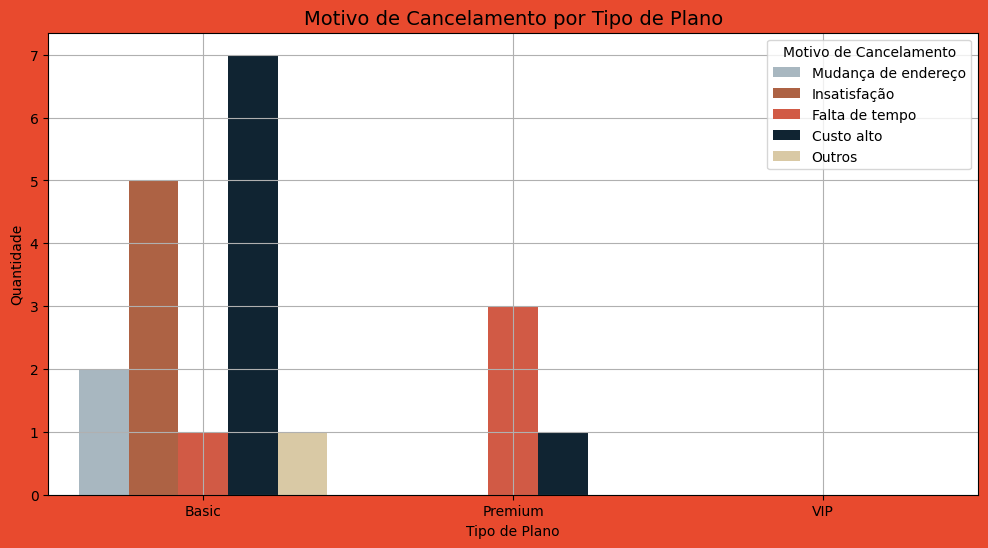

In [9]:
# Tamanho e cor da figura
plt.figure(figsize=(12, 6), facecolor="#E84A2E")

# Paleta de cores das barras
colors = [
    "#A4B8C4",
    "#BF5B32",
    "#E84A2E",
    "#0A2538",
    "#E2CC9C",
]

# Plotando o gráfico com seaborn por permitir a melhor organização dos dados
sns.countplot(
    data=df,
    x="membership_type",
    hue="cancellation_reason",
    palette=colors,
)

# Customização
plt.title(
    "Motivo de Cancelamento por Tipo de Plano",
    fontsize=14,
)
plt.xlabel("Tipo de Plano")
plt.ylabel("Quantidade")
plt.legend(title="Motivo de Cancelamento")
plt.grid(True)

plt.show()

# **Análise de satisfação dos membros da academia**

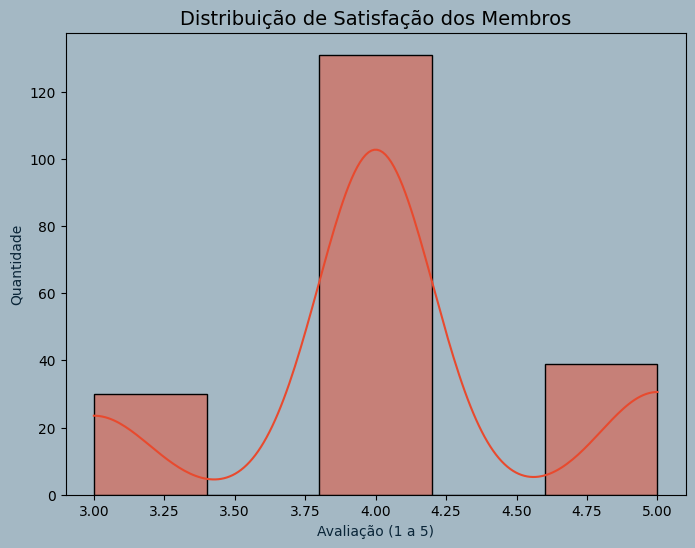

In [10]:
# Tamanho e cor da figura
plt.figure(figsize=(8, 6), facecolor="#A4B8C4")

# Plotando o histograma
sns.histplot(
    data=df,
    x="satisfaction_score",
    bins=5,
    color="#E84A2E",
    kde=True,
)

# Definições
plt.title(
    "Distribuição de Satisfação dos Membros",
    fontsize=14,
)
plt.xlabel("Avaliação (1 a 5)", color="#0A2538")
plt.ylabel("Quantidade", color="#0A2538")
plt.gca().set_facecolor("#A4B8C4")

plt.show()

### Análise de ROI (Retorno sobre Investimento)

A análise de ROI é fundamental para entender a eficiência financeira das operações da academia. Nesta seção, calculamos o retorno sobre o investimento com base nas seguintes estimativas:

- **Receita Total Mensal**: Calculada multiplicando o número total de membros ativos pela taxa mensal média que cada membro paga.
  
- **Custo Total Mensal**: Composto por custos fixos (como aluguel, salários, utilidades) e custos variáveis que dependem do número de membros (como manutenção de equipamentos e materiais).

- **Cálculo do ROI**: Utilizamos a fórmula:
  
  ROI = [(Receita Total - Custo Total) / Custo Total] * 100

Um ROI positivo indica que a academia está gerando lucro além dos custos, enquanto um ROI negativo sinaliza prejuízo. Esta métrica auxilia na tomada de decisões estratégicas, como ajustes nas taxas de associação, controle de custos ou investimentos em melhorias para aumentar a satisfação e retenção dos membros.

,activity,Participantes,Receita_Total_R$,Custo_Fixo,ROI (%)
0,Zumba,39,1560.0,700.0,122.857143
1,Yoga,34,1530.0,800.0,91.250000
2,Musculação,32,1760.0,1000.0,76.000000
3,Pilates,26,1690.0,1500.0,12.666667
4,Boxing,22,1320.0,1000.0,32.000000
5,CrossFit,19,1330.0,2000.0,-33.500000
6,Spinning,16,1200.0,1500.0,-20.000000
7,Jump,12,600.0,1200.0,-50.000000


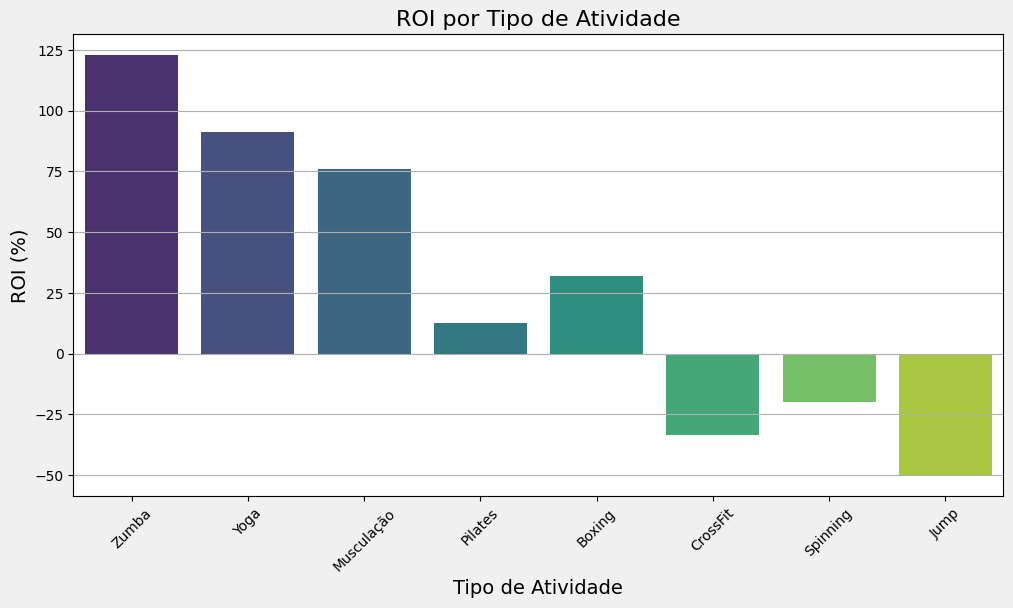

In [11]:
# Definindo receita por participante para cada atividade
receita_por_atividade = {
    "Boxing": 60.0,
    "CrossFit": 70.0,
    "Jump": 50.0,
    "Musculação": 55.0,
    "Pilates": 65.0,
    "Spinning": 75.0,
    "Yoga": 45.0,
    "Zumba": 40.0,
}

# Definindo custo fixo por atividade
custo_fixo_por_atividade = {
    "Boxing": 1000.0,
    "CrossFit": 2000.0,
    "Jump": 1200.0,
    "Musculação": 1000.0,
    "Pilates": 1500.0,
    "Spinning": 1500.0,
    "Yoga": 800.0,
    "Zumba": 700.0,
}

# Cálculo do número de participantes por atividade
participantes_por_atividade = (
    df["activity"].value_counts().reset_index()
)
participantes_por_atividade.columns = [
    "activity",
    "Participantes",
]

# Criar DataFrame para receita e custo fixo
df_receita = pd.DataFrame(
    list(receita_por_atividade.items()),
    columns=[
        "activity",
        "Receita_por_participante",
    ],
)
df_custo = pd.DataFrame(
    list(custo_fixo_por_atividade.items()),
    columns=["activity", "Custo_Fixo"],
)

# Merge dos dados
df_roi = participantes_por_atividade.merge(
    df_receita, on="activity", how="left"
)
df_roi = df_roi.merge(
    df_custo, on="activity", how="left"
)

# Substituir valores faltantes de Receita e Custo Fixo por 0 (se houver)
df_roi["Receita_por_participante"] = df_roi[
    "Receita_por_participante"
].fillna(0)
df_roi["Custo_Fixo"] = df_roi[
    "Custo_Fixo"
].fillna(0)

# Calcular Receita Total
df_roi["Receita_Total_R$"] = (
    df_roi["Participantes"]
    * df_roi["Receita_por_participante"]
)

# Calcular ROI
df_roi["ROI (%)"] = (
    (
        df_roi["Receita_Total_R$"]
        - df_roi["Custo_Fixo"]
    )
    / df_roi["Custo_Fixo"]
) * 100

# Mostrar a tabela de ROI
display(
    df_roi[
        [
            "activity",
            "Participantes",
            "Receita_Total_R$",
            "Custo_Fixo",
            "ROI (%)",
        ]
    ]
)

# Visualização do ROI por Atividade
plt.figure(figsize=(12, 6), facecolor="#F0F0F0")
sns.barplot(
    x="activity",
    y="ROI (%)",
    data=df_roi,
    palette="viridis",
    hue="activity",
)

plt.title(
    "ROI por Tipo de Atividade", fontsize=16
)
plt.xlabel("Tipo de Atividade", fontsize=14)
plt.ylabel("ROI (%)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y")

plt.show()